# Изучение данных из файла

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats as st


In [3]:
df = pd.read_csv("games.csv")
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().mean().apply('{:.0%}'.format)

Name                0%
Platform            0%
Year_of_Release     2%
Genre               0%
NA_sales            0%
EU_sales            0%
JP_sales            0%
Other_sales         0%
Critic_Score       51%
User_Score         40%
Rating             40%
dtype: object

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated(['Name','Platform','Year_of_Release'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
df= df.drop_duplicates(subset=['Name','Platform','Year_of_Release'],keep='first')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16712 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16712 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8136 non-null   float64
 9   User_Score       10013 non-null  object 
 10  Rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a name="0."></a> Описание данных:

* <b>Name</b> — название игры
* <b>Platform</b> —  платформа
* <b>Year_of_Release</b> — год выпуска
* <b>Genre</b> — жанр игры
* <b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий)
* <b>EU_sales</b> — продажи в Европе (миллионы проданных копий)
* <b>JP_sales</b> — продажи в Японии (миллионы проданных копий)
* <b>Other_sales</b> — продажи в других странах (миллионы проданных копий)
* <b>Critic_Score</b> — оценка критиков (максимум 100)
* <b>User_Score</b> — оценка пользователей (максимум 10)
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

**Вывод**


Ознакомились с данными и изучили их структуру. Видим, что требуется изменение название столбцов (приведем к нижнему регистру), так же есть пропущенные значения и рассмотрим типы данных столбцов (при необходимости изменим).

# Предобработка данных

**Приведем названия столбцов к нижнему регистру**

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбцы приведены к нижнему регистру.

**Преобразование данных в нужные типы и заполним пропуски**

Расмотрим столбец name и genre

In [13]:
df['name'].isna().sum()

1

In [14]:
df = df.dropna(subset=['name'])

In [15]:
df['genre'].isna().sum()

0

Пропуски в столбце genre были в тех же строчках как и в столбце name.

В столбце platform отсутствуют пропуски, тип данных оставляем. Данный столбец не трогаем.

Расмотрим столбец year_of_release.

In [16]:
df['year_of_release'].isna().sum()

269

In [17]:
df = df.dropna(subset=['year_of_release'])

In [18]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Удалили пропуски, указали год в формает int.

Расмотрим столбец critic_score.

In [20]:
df['critic_score'].isna().sum()

8461

In [21]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Пропусков очень много, удалять их не будем, т.к. они ханимают 51% от всей базы данных, заменим пропуски на (-1) и приведем столбец к типу (int)

In [22]:
df['critic_score'] = df['critic_score'].fillna(-1).astype(int)

In [23]:
df['critic_score'].isna().sum()

0

In [24]:
df['critic_score'].head()

0    76
1    -1
2    82
3    80
4    -1
Name: critic_score, dtype: int32

Убрали пропуски и поменяли тип данных.

Расмотрим столбец user_score.

In [25]:
df['user_score'].isna().sum()

6605

In [26]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке присутсвует абривиатура tbd (To Be Discussed) - подлежит обсуждению, то есть значит,что оценка почему то не определена. Заменим абривиатуру на NaN.

In [27]:
df[df['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,-1,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,-1,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,-1,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,-1,tbd,E


In [28]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [29]:
df['user_score'].isna().sum()

8981

In [30]:
df['user_score'] = df['user_score'].fillna(-1).astype(float)

In [31]:
df['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Обратили внимание на аббревиатуру tbd, убрали пропуски, заменили тип данных на float.

Расмотрим столбец rating.

In [32]:
df['rating'].isna().sum()

6676

In [33]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце присутствуют строки с рейтингом K-A. Этот рейтинг был отменен в пользу рейтинга Е в 1997 году. Заменим ретинг К-А на Е.

Пропуски заменим на значение NR (Нет рейтинга).

In [34]:
df['rating'] = df['rating'].replace(np.nan, 'NR')

In [35]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [36]:
df['rating'].isna().sum()

0

In [37]:
df['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [38]:
df['total_sales'] = df['na_sales'] +  df['eu_sales'] +  df['jp_sales'] + df['other_sales']

In [39]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NR,31.38


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.6+ MB


In [41]:
df[df['critic_score'] == -1].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NR,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NR,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NR,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,NR,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,-1,-1.0,NR,23.09
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,-1,-1.0,NR,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,-1,-1.0,NR,18.24
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,-1,-1.0,NR,18.14
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,-1,-1.0,NR,17.28


<a name="0."></a> **Вывод:**


* привели названия столбцов к нижнему регистру
* преобразовали столбцы в нужные типы данных
* обработали пропуски - в столбцах сritic_score, user_score. Заменили пропуски -1, будем учитывать это в дальнейшем исследовании.
* обработали пропуски - в столбце rating. Заменили пропуски на 'NR', рейтинг 'K-A', заменили 'E'.
* от пропусков в name и genre избавились;
* user_score изменили значения tbd на -1;
* посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales

Возможно отсутствие мнения критиков и пользователей, а так же отсутсвие рейтинга или неопределенность пользовательских мнений(TDP) связано с тем:
* игры выпускались до 1994, дата создания Entertainment Software Rating Board (ESRB)
* не популярность жанра
* не популярность самой игры(маленькие продажи)
* не популярность платформы
* игра выпускалась только на внутренние рынки (например в Японии или Европе есть свои рейтинговые агенства, но информации по ним нету)
* техническая ошибка

In [42]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en co

# Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы.**

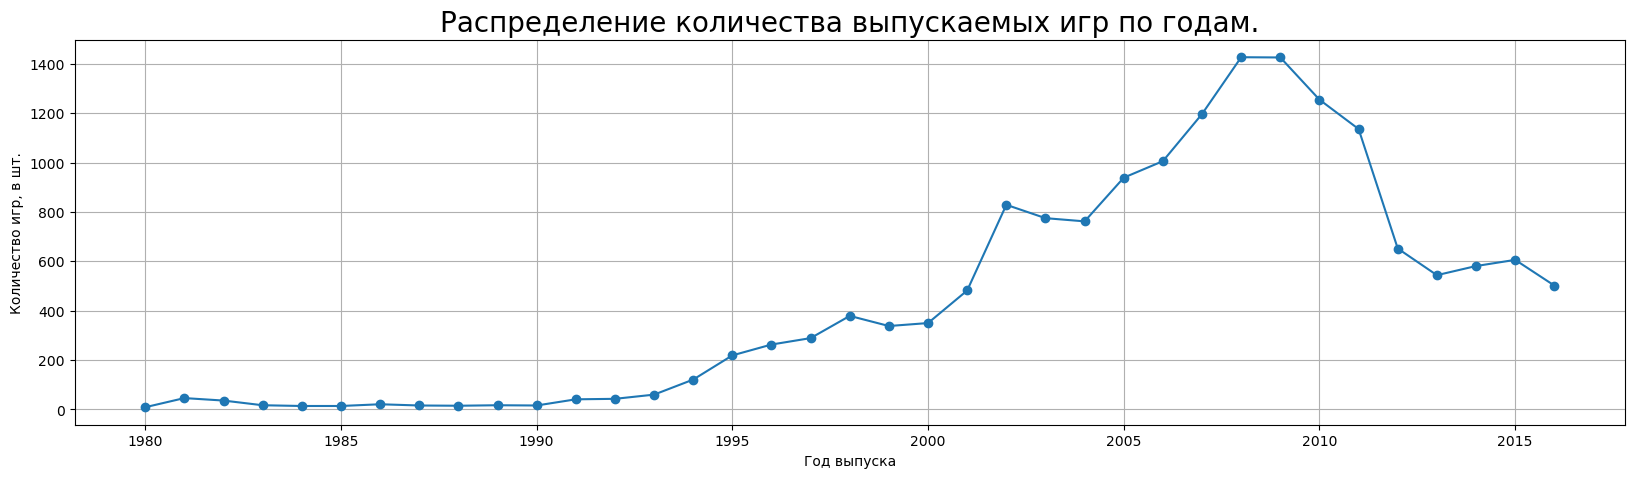

In [43]:
plt.figure(figsize=(20, 5))
plt.title('Распределение количества выпускаемых игр по годам.', fontsize=20)
plt.ylabel('Количество игр, в шт.')
plt.xlabel('Год выпуска')
plt.plot(df.groupby('year_of_release')['name'].count(), 'o-', label='NUMBER OF GAMES', alpha=1)
plt.grid(True)


In [44]:
df.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,9.0,46.0,36.0,11.0,1.0,1.0,2.0,6.0,2.0,2.0,...,-,-,-,-,-,-,-,-,-,-
3DO,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3DS,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0
DC,-,-,-,-,-,-,-,-,-,-,...,1.0,1.0,-,-,-,-,-,-,-,-
DS,-,-,-,-,-,1.0,-,-,-,-,...,376.0,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-
GB,-,-,-,-,-,-,-,-,1.0,10.0,...,-,-,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,-,-,-,...,6.0,-,-,-,-,-,-,-,-,-
GC,-,-,-,-,-,-,-,-,-,-,...,4.0,-,-,-,-,-,-,-,-,-
GEN,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


Разделим таблицу.

In [45]:
df.query('year_of_release <= 1992').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992
platform,,,,,,,,,,,,,
2600,9.0,46.0,36.0,11.0,1.0,1.0,2.0,6.0,2.0,2.0,-,-,-
DS,-,-,-,-,-,1.0,-,-,-,-,-,-,-
GB,-,-,-,-,-,-,-,-,1.0,10.0,3.0,9.0,7.0
GEN,-,-,-,-,-,-,-,-,-,-,1.0,1.0,6.0
GG,-,-,-,-,-,-,-,-,-,-,-,-,1.0
NES,-,-,-,6.0,13.0,11.0,19.0,10.0,11.0,5.0,8.0,7.0,3.0
PC,-,-,-,-,-,1.0,-,-,1.0,-,-,-,5.0
SNES,-,-,-,-,-,-,-,-,-,-,4.0,24.0,21.0


In [46]:
df.query('1990 <= year_of_release <= 2009').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
platform,,,,,,,,,,,,,,,,,,,,
3DO,-,-,-,-,1.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
DC,-,-,-,-,-,-,-,-,7.0,14.0,20.0,8.0,1.0,-,-,-,-,1.0,1.0,-
DS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,23.0,118.0,201.0,376.0,492.0,403.0
GB,3.0,9.0,7.0,-,3.0,4.0,6.0,8.0,8.0,11.0,17.0,10.0,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,-,-,-,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,-,-
GC,-,-,-,-,-,-,-,-,-,-,-,22.0,152.0,144.0,83.0,97.0,40.0,4.0,-,-
GEN,1.0,1.0,6.0,7.0,12.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GG,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
N64,-,-,-,-,-,-,18.0,49.0,77.0,102.0,60.0,9.0,1.0,-,-,-,-,-,-,-


По графику видно, что рост выпуска компьютерных игр приходится с 1991 по 2008. В 2008 г. макс кол-во игр. после выпуск игр идет на спад. До 1991 на одном уровне.

С 1980 по 1990 была эпоха старых консолей. Рост консолей связен скорее всего с тем. что Super Nintendo Entertainment System (SNES) была выпущена в Японии 21 ноября 1990 года, уже 23 августа 1991 года она выходит для американского рынка, что приводит к популиризации игр. Спад выпуск новых игр с 2008 может быть обусловленно началом Мирового экономического кризиса.

**Посмотрим, как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы.**

**Cамые популярные платформы с наибольшим количеством проданных игр.**

In [47]:
platform_total_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_total_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


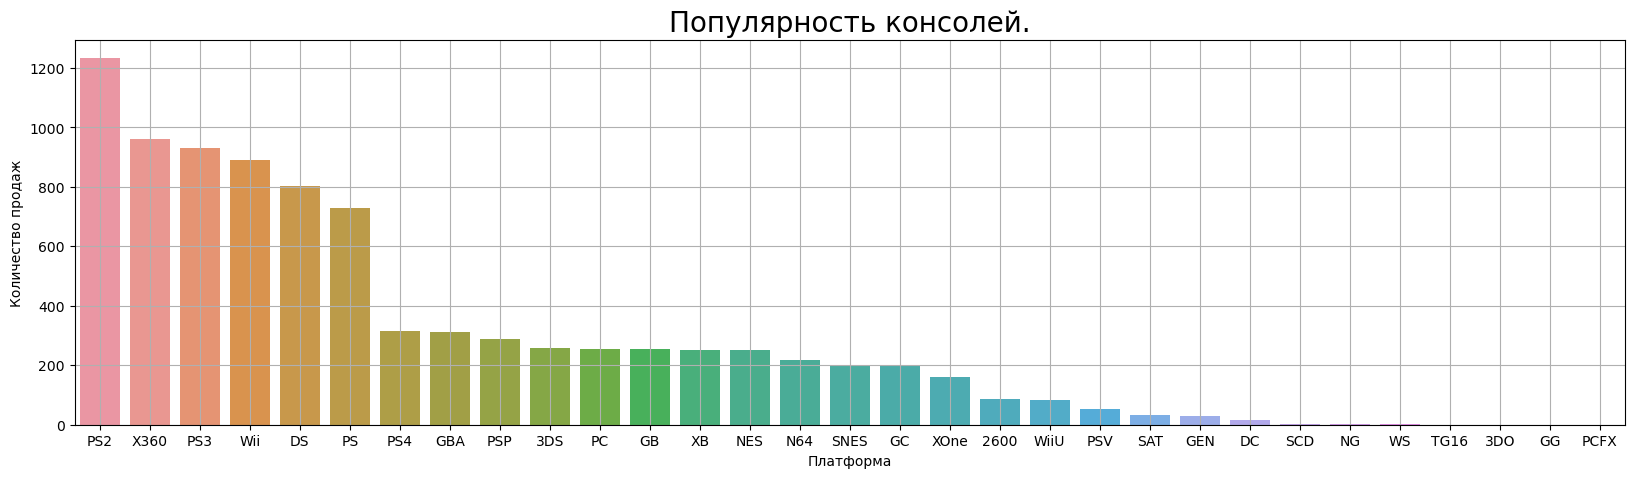

In [48]:
plt.figure(figsize=(20, 5))
plt.title('Популярность консолей.', fontsize=20)
sns.barplot(x=platform_total_sales.index, y=platform_total_sales['total_sales'])
plt.ylabel('Количество продаж')
plt.xlabel('Платформа')
plt.grid(True);

Самые популярные с наибольшем отрывом лидируют 6 платформ.

PS4, XBOXONE не менее популярные платформы, хотя и не попали в список лидеров. Скорее всего это связано с тем, что они вышли относительно недавно относительно других платформ на момент составления базы данных.

**Рассмотрим Топ 6 платформ**

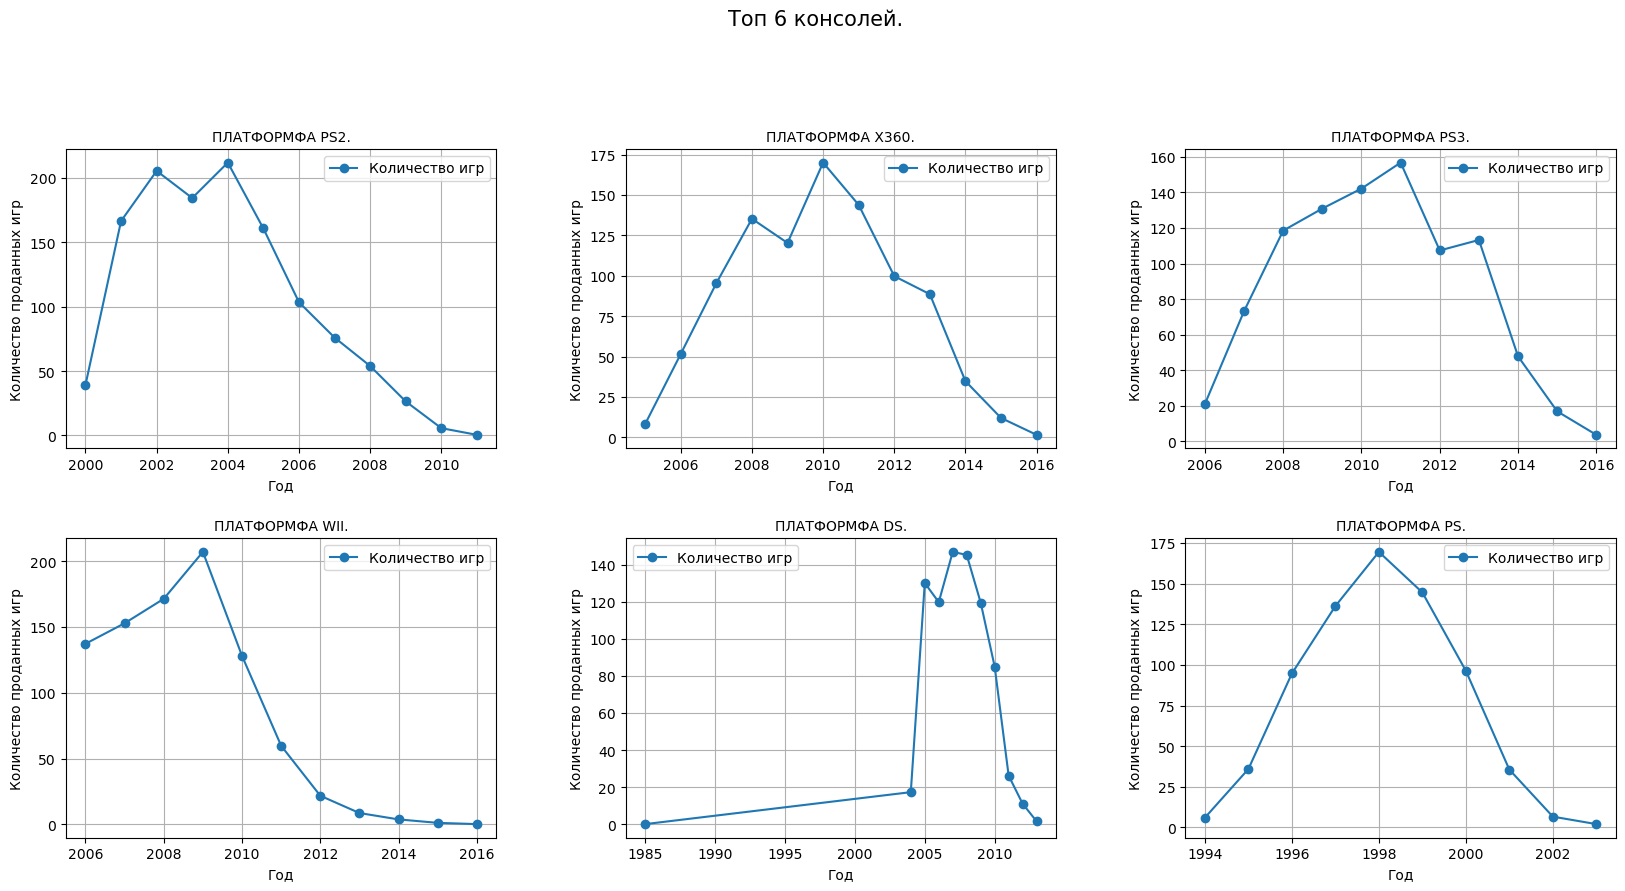

In [49]:
position = 0
top_platform = platform_total_sales.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Топ 6 консолей.', fontsize=15)
for name_of_platform in top_platform:
    position += 1
    pvt = df.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'ПЛАТФОРМФA {name_of_platform.upper()}.', fontsize=10)
    plt.plot(pvt, 'o-', label='Количество игр', alpha=1)
    plt.ylabel('Количество проданных игр')
    plt.xlabel('Год')
    plt.grid(True)
    plt.legend()
plt.show();

Все платформы на графике имеют тенденцию спада к 2016 году.

**Рассмотрим жизненный цикл консоли**

In [50]:
life_cycle_of_consoles = []
for name_platform in top_platform:
    life_cycle = df.query('(platform == @name_platform)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    life_cycle_of_consoles.append(life_cycle)
mean_life_cycle = int(np.mean(life_cycle_of_consoles))
mean_life_cycle

11

Средний жизненый цикл консоли составляет 11 лет

**Период для составления прогноза на 2017 год.**

Возьмем актуальный периуд последние 5 лет с 2012 г. для составления прогноза за 2017 год.

In [51]:
df_forecast = df.query('year_of_release >= 2012')

In [52]:
df_forecast_quantity = len(df_forecast['platform'].unique())

print(f'\nКоличество консолей для прогноза - {df_forecast_quantity }')


Количество консолей для прогноза - 11


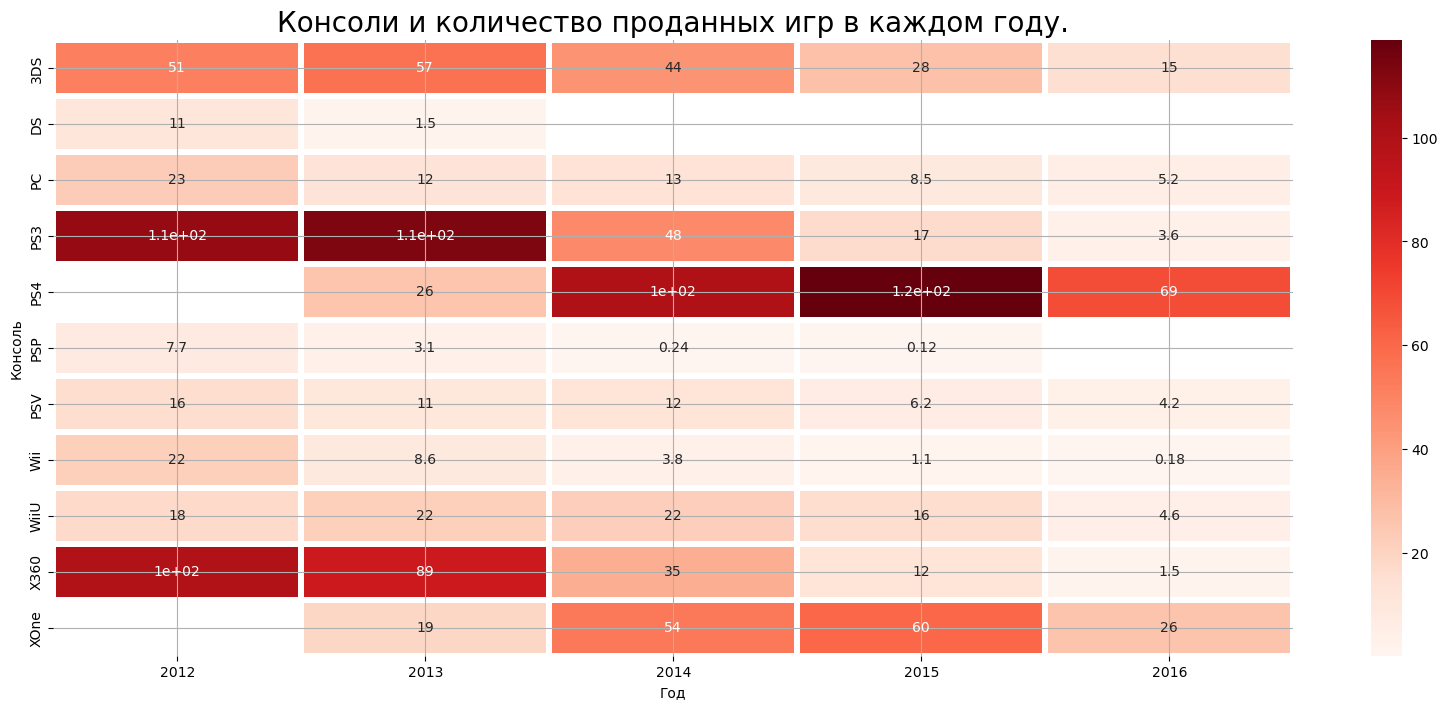

In [53]:
plt.figure(figsize=(20, 8))
plt.title('Консоли и количество проданных игр в каждом году.', fontsize=20)
(sns.heatmap(df_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'), annot=True, cmap='Reds',linewidths=3))
plt.ylabel('Консоль')
plt.xlabel('Год')
plt.grid(True);

In [54]:
df_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Топ 5 платформ будут: 3DS, XONE, PS4, WIIU, PC. Многие консоли к 2016 г идут на спад, т.к. это связано с выходом более новой консоли, взамен старой. Как например на смену PS3 пришла PS4.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [55]:
df_list_platforms = ['PS4', 'XOne', 'WiiU', '3DS', 'PC']
df_platform = df_forecast[df_forecast['platform'].isin(df_list_platforms)]
df_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,NR,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90


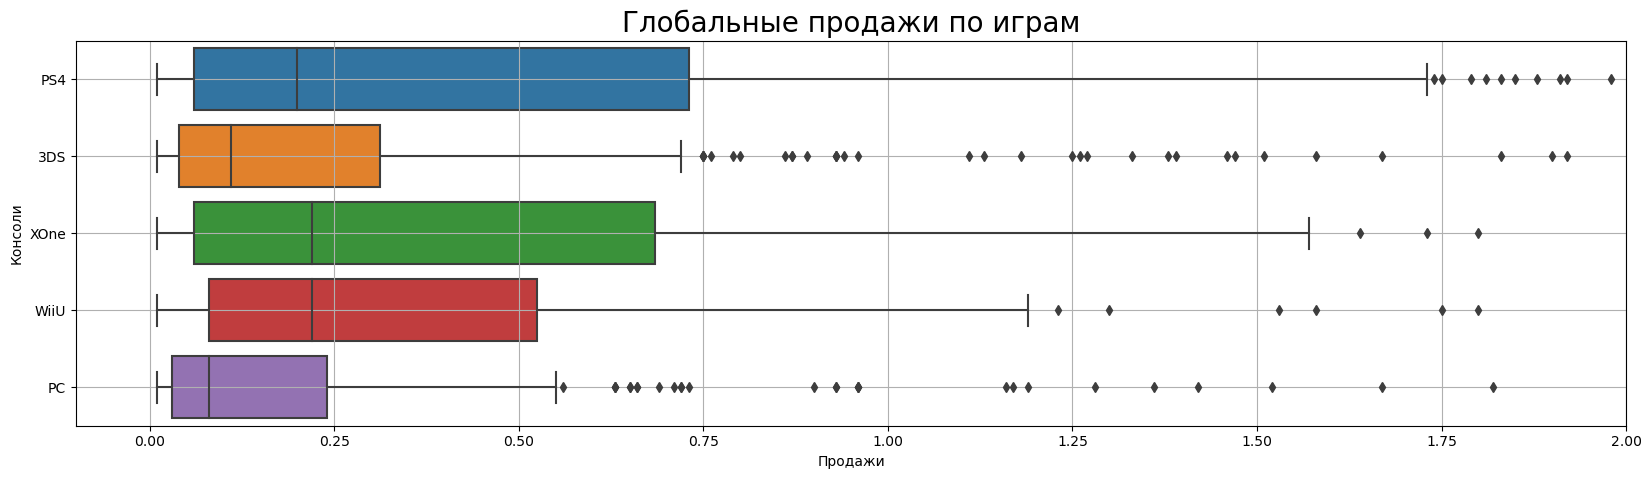

In [56]:
plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('Глобальные продажи по играм', fontsize=20)
sns.boxplot(x=df_platform['total_sales'], y=df_platform['platform'], orient='h')
plt.ylabel('Консоли')
plt.xlabel('Продажи')
plt.grid(True);

Большего всего продаются игры для PS4, XBOXONE, WIIU.

На графике видно:
* Медиана у лидеров продаж находится дальше.
* Размах усов для лидеров шире чем у двух других консолей. Данные консоли имеют большое число продаж. Выбросы и анамалии находятся за приделами усов.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.**

In [57]:
df_game_ps4 = df_platform.query('platform == "PS4" and user_score != -1 and critic_score != -1')
print(len(df_game_ps4))

249


In [58]:
df_game_ps4_user = df_platform.query('platform == "PS4" and user_score != -1')
df_game_ps4_critic = df_platform.query('platform == "PS4" and critic_score != -1')
print(len(df_game_ps4_user))
print(len(df_game_ps4_critic))

257
252


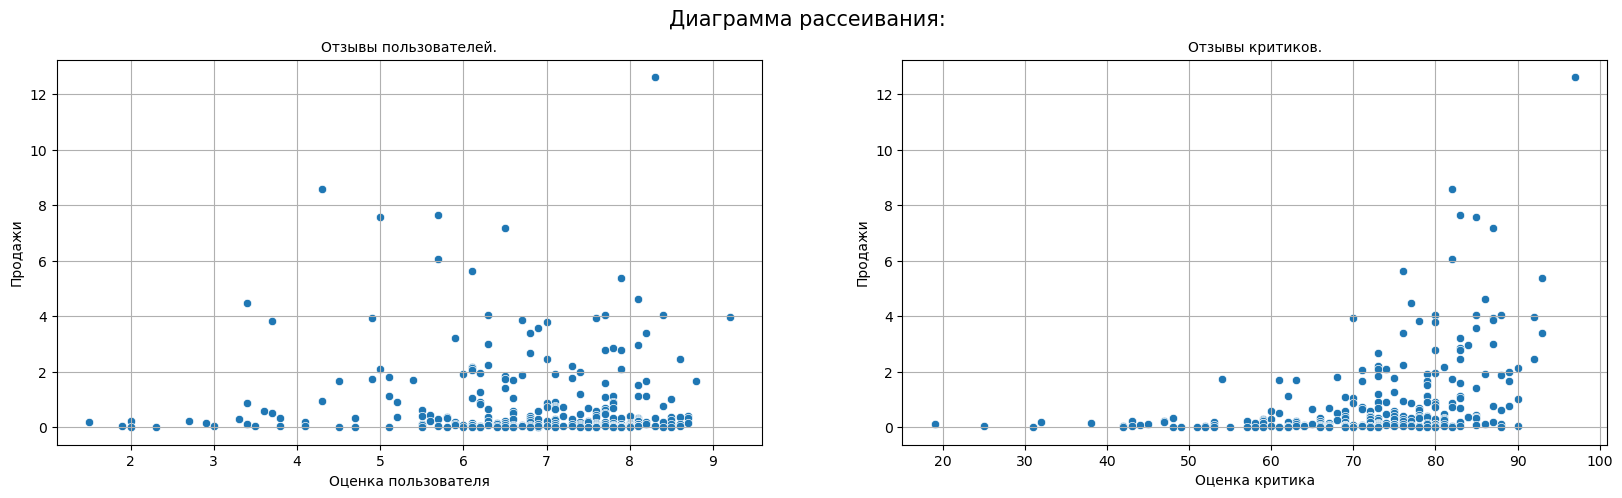

In [60]:
plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеивания:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей.', fontsize=10)
sns.scatterplot(x=df_game_ps4_user['user_score'], y=df_game_ps4_user['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков.', fontsize=10)
sns.scatterplot(x=df_game_ps4_critic['critic_score'], y=df_game_ps4_critic['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка критика')
plt.grid(True);

In [61]:
cor_user_score = df_game_ps4_user['total_sales'].corr(df_game_ps4_user['user_score'])
cor_critic_score = df_game_ps4_critic['total_sales'].corr(df_game_ps4_critic['critic_score'])
print(f'\nКоэффицент корреляции отзывов пользователей - {cor_user_score:.2f}')
print(f'\nКоэффицент корреляции отзывов критиков - {cor_critic_score:.2f}')


Коэффицент корреляции отзывов пользователей - -0.03

Коэффицент корреляции отзывов критиков - 0.41


Коэф. корреляции отзывов критиков положительный. Отзывы оказывают среднее влияние. Мнение критиков больше влиет на продажи, чем мнение критиков.

**Соотнесем выводы с продажами игр на других платформах.**

Рассмотрим по всем консолям.


Коэффицент корреляции отзывов пользователей по всем консолям - 0.05

Коэффицент корреляции отзывов критиков по всем консолям - 0.32


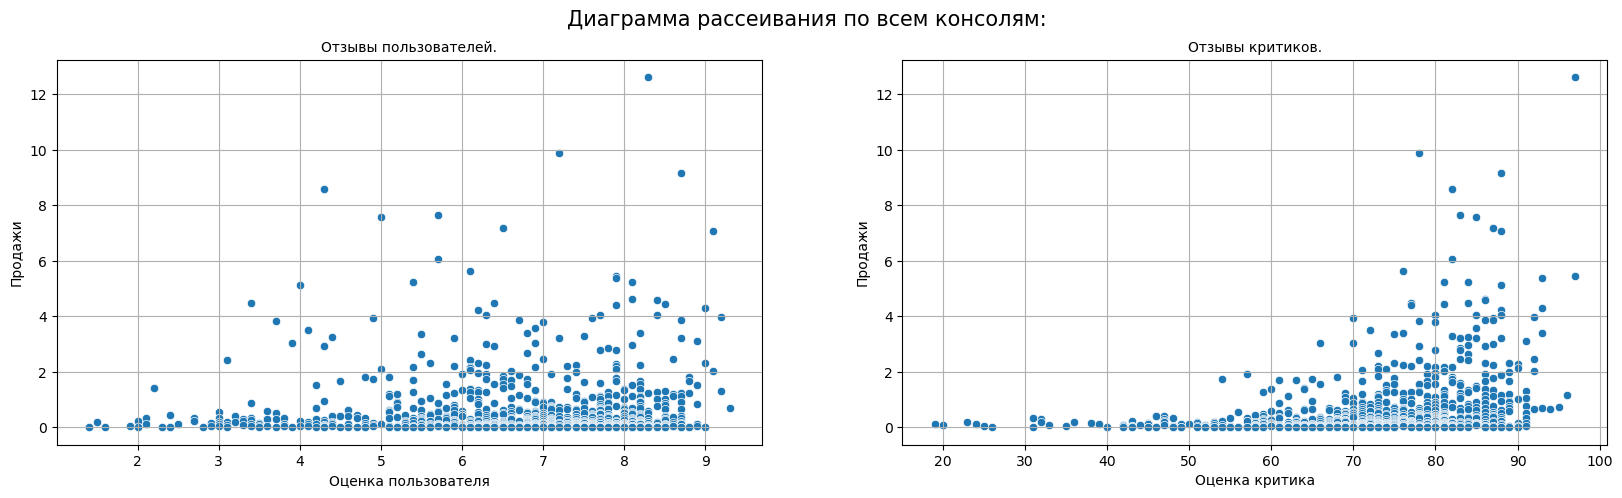

In [62]:
df_game_total_user = df_platform.query('user_score != -1')
df_game_total_critic = df_platform.query('critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеивания по всем консолям:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей.', fontsize=10)
sns.scatterplot(x=df_game_total_user['user_score'], y=df_game_total_user['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков.', fontsize=10)
sns.scatterplot(x=df_game_total_critic['critic_score'], y=df_game_total_critic['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка критика')
plt.grid(True);

cor_user_score_total = df_game_total_user['total_sales'].corr(df_game_total_user['user_score'])
cor_critic_score_total = df_game_total_critic['total_sales'].corr(df_game_total_critic['critic_score'])
print(f'\nКоэффицент корреляции отзывов пользователей по всем консолям - {cor_user_score_total:.2f}')
print(f'\nКоэффицент корреляции отзывов критиков по всем консолям - {cor_critic_score_total:.2f}')

Рассмотри XOne.


Коэффицент корреляции отзывов пользователей по XOne - -0.07

Коэффицент корреляции отзывов критиков по XOne - 0.42


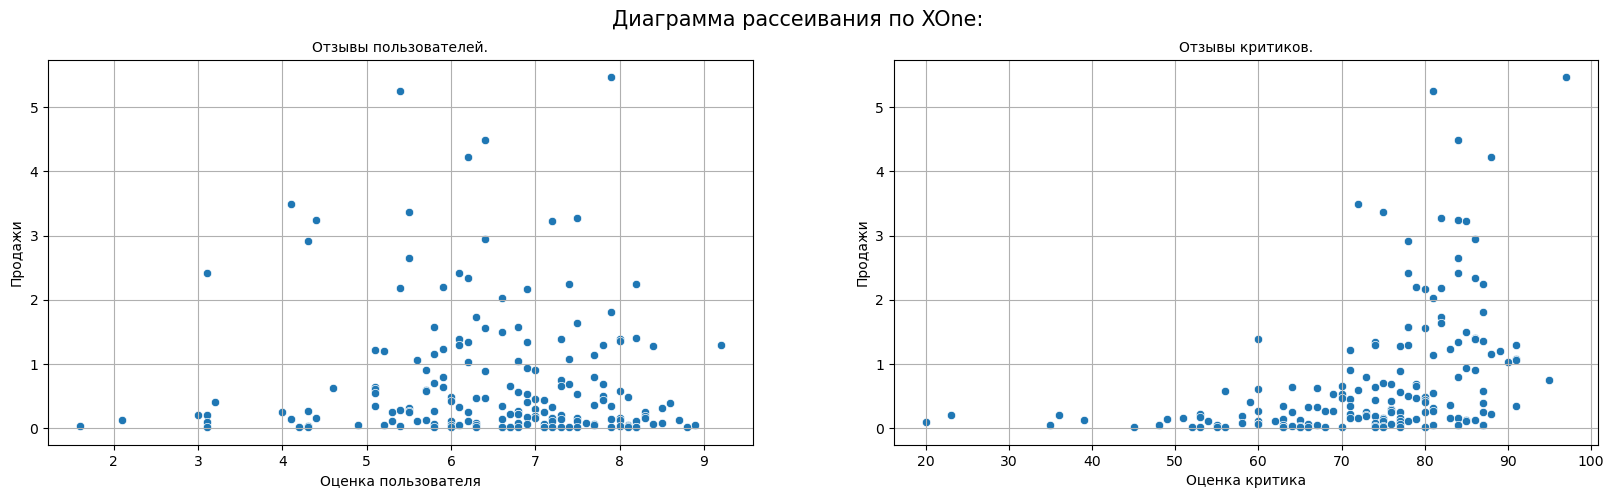

In [63]:
df_game_xone_user = df_platform.query('platform == "XOne" and user_score != -1')
df_game_xone_critic = df_platform.query('platform == "XOne" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеивания по XOne:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей.', fontsize=10)
sns.scatterplot(x=df_game_xone_user['user_score'], y=df_game_xone_user['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков.', fontsize=10)
sns.scatterplot(x=df_game_xone_critic['critic_score'], y=df_game_xone_critic['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка критика')
plt.grid(True);

cor_user_score_xone = df_game_xone_user['total_sales'].corr(df_game_xone_user['user_score'])
cor_critic_score_xone = df_game_xone_critic['total_sales'].corr(df_game_xone_critic['critic_score'])
print(f'\nКоэффицент корреляции отзывов пользователей по XOne - {cor_user_score_xone:.2f}')
print(f'\nКоэффицент корреляции отзывов критиков по XOne - {cor_critic_score_xone:.2f}')

Рассмотри WiiU.


Коэффицент корреляции отзывов пользователей по WiiU - 0.40

Коэффицент корреляции отзывов критиков по WiiU - 0.35


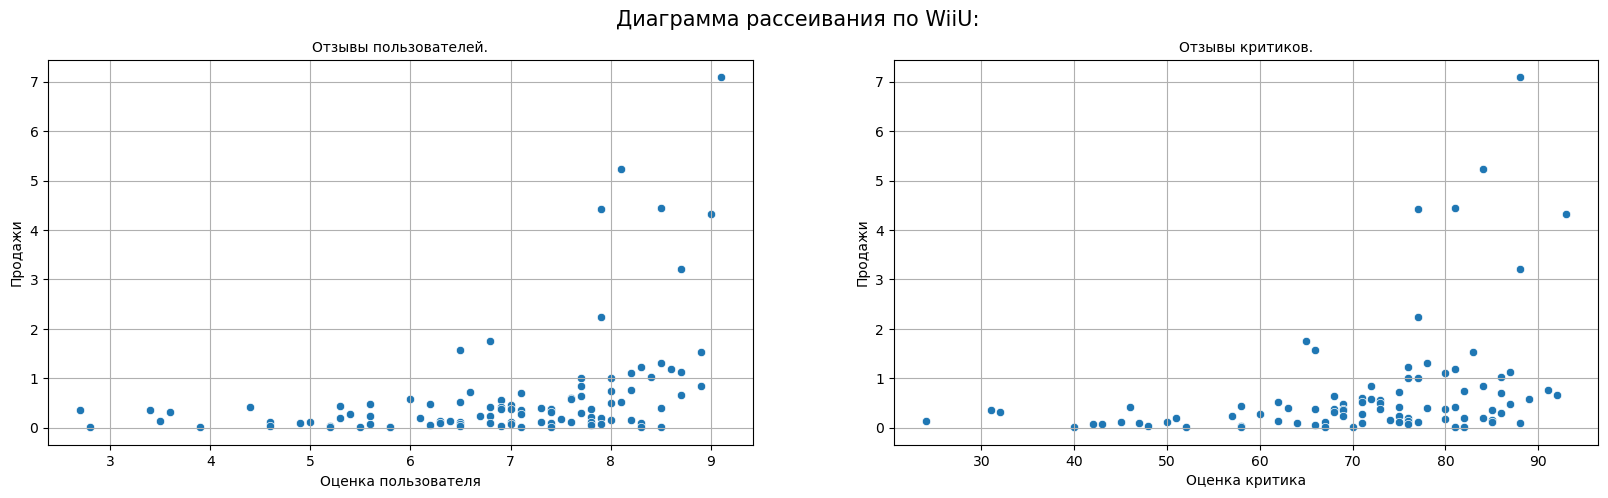

In [64]:
df_game_wiiu_user = df_platform.query('platform == "WiiU" and user_score != -1')
df_game_wiiu_critic = df_platform.query('platform == "WiiU" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеивания по WiiU:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей.', fontsize=10)
sns.scatterplot(x=df_game_wiiu_user['user_score'], y=df_game_wiiu_user['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков.', fontsize=10)
sns.scatterplot(x=df_game_wiiu_critic['critic_score'], y=df_game_wiiu_critic['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка критика')
plt.grid(True);

cor_user_score_wiiu = df_game_wiiu_user['total_sales'].corr(df_game_wiiu_user['user_score'])
cor_critic_score_wiiu = df_game_wiiu_critic['total_sales'].corr(df_game_wiiu_critic['critic_score'])
print(f'\nКоэффицент корреляции отзывов пользователей по WiiU - {cor_user_score_wiiu:.2f}')
print(f'\nКоэффицент корреляции отзывов критиков по WiiU - {cor_critic_score_wiiu:.2f}')

Рассмотри 3DS.


Коэффицент корреляции отзывов пользователей по 3DS - 0.20

Коэффицент корреляции отзывов критиков по 3DS - 0.32


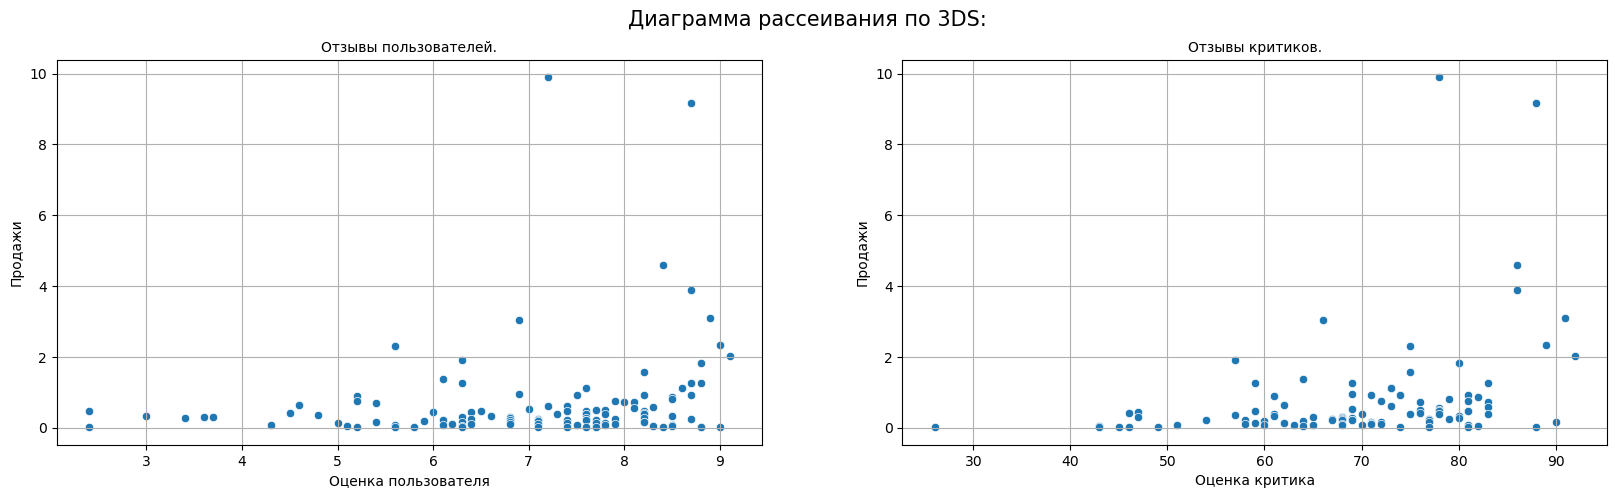

In [65]:
df_game_3ds_user = df_platform.query('platform == "3DS" and user_score != -1')
df_game_3ds_critic = df_platform.query('platform == "3DS" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеивания по 3DS:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей.', fontsize=10)
sns.scatterplot(x=df_game_3ds_user['user_score'], y=df_game_3ds_user['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков.', fontsize=10)
sns.scatterplot(x=df_game_3ds_critic['critic_score'], y=df_game_3ds_critic['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка критика')
plt.grid(True);

cor_user_score_3ds = df_game_3ds_user['total_sales'].corr(df_game_3ds_user['user_score'])
cor_critic_score_3ds = df_game_3ds_critic['total_sales'].corr(df_game_3ds_critic['critic_score'])
print(f'\nКоэффицент корреляции отзывов пользователей по 3DS - {cor_user_score_3ds:.2f}')
print(f'\nКоэффицент корреляции отзывов критиков по 3DS - {cor_critic_score_3ds:.2f}')

Рассмотри PC.


Коэффицент корреляции отзывов пользователей по PC - -0.12

Коэффицент корреляции отзывов критиков по PC - 0.24


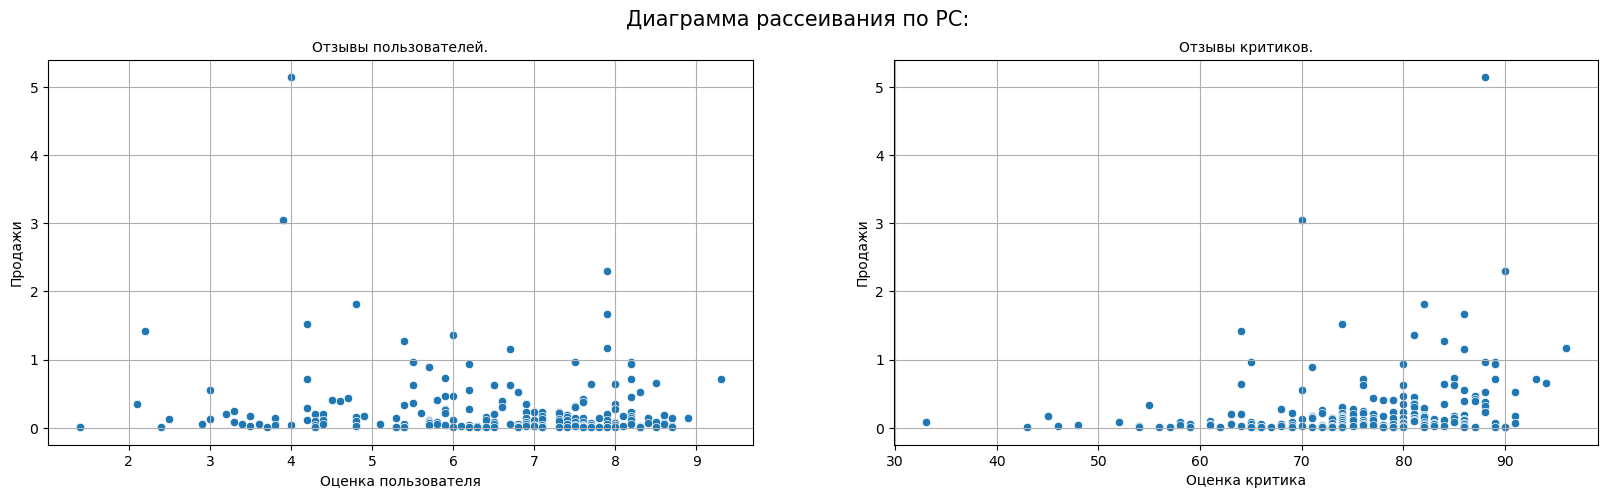

In [66]:
df_game_pc_user = df_platform.query('platform == "PC" and user_score != -1')
df_game_pc_critic = df_platform.query('platform == "PC" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеивания по PC:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей.', fontsize=10)
sns.scatterplot(x=df_game_pc_user['user_score'], y=df_game_pc_user['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков.', fontsize=10)
sns.scatterplot(x=df_game_pc_critic['critic_score'], y=df_game_pc_critic['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Оценка критика')
plt.grid(True);

cor_user_score_pc = df_game_pc_user['total_sales'].corr(df_game_pc_user['user_score'])
cor_critic_score_pc = df_game_pc_critic['total_sales'].corr(df_game_pc_critic['critic_score'])
print(f'\nКоэффицент корреляции отзывов пользователей по PC - {cor_user_score_pc:.2f}')
print(f'\nКоэффицент корреляции отзывов критиков по PC - {cor_critic_score_pc:.2f}')

Оценка критиков влияет больше на продажи, чем оценка пользователей. Единственным исключением является, платформа WiiU, там на немного привалирует мнение пользователей. Самое большое влияние на продажу имеют критики на таких платформах, как PS4 и XOne. Это может быть обусловленно тем, что данные консоли вышли недавно (относительно отчета) в 2013 и имеют самую большую популярность.

**Посмотрим на общее распределение игр по жанрам.**

Расмотрим распределение по ТОП 5 платформ.

,genre,total_sales
0,Shooter,0.440
1,Sports,0.260
2,Platform,0.245
3,Role-Playing,0.205
4,Fighting,0.155
5,Misc,0.150
6,Action,0.130
7,Racing,0.120
8,Simulation,0.120
9,Strategy,0.080


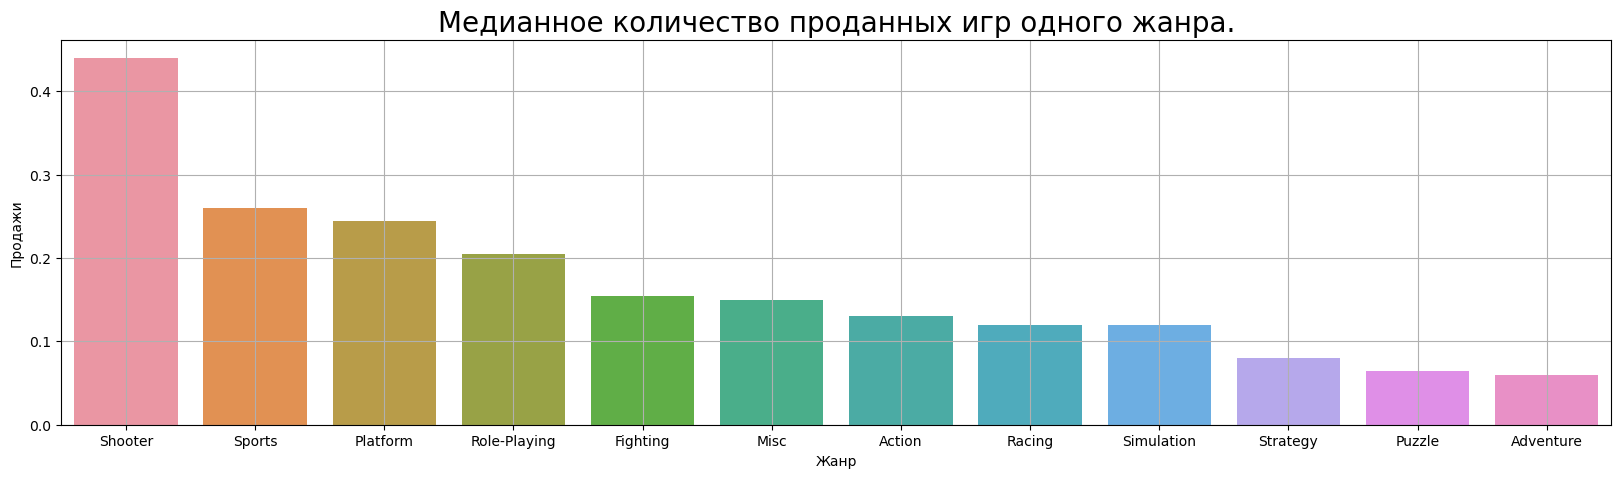

In [68]:
all_genre_median = df_platform.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Медианное количество проданных игр одного жанра.', fontsize=20)
sns.barplot(x=all_genre_median['genre'], y=all_genre_median['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);
all_genre_median

,genre,total_sales
0,Action,211.11
1,Shooter,169.30
2,Role-Playing,135.38
3,Sports,93.00
4,Platform,49.40
5,Misc,38.26
6,Racing,31.31
7,Simulation,31.27
8,Fighting,25.95
9,Adventure,14.36


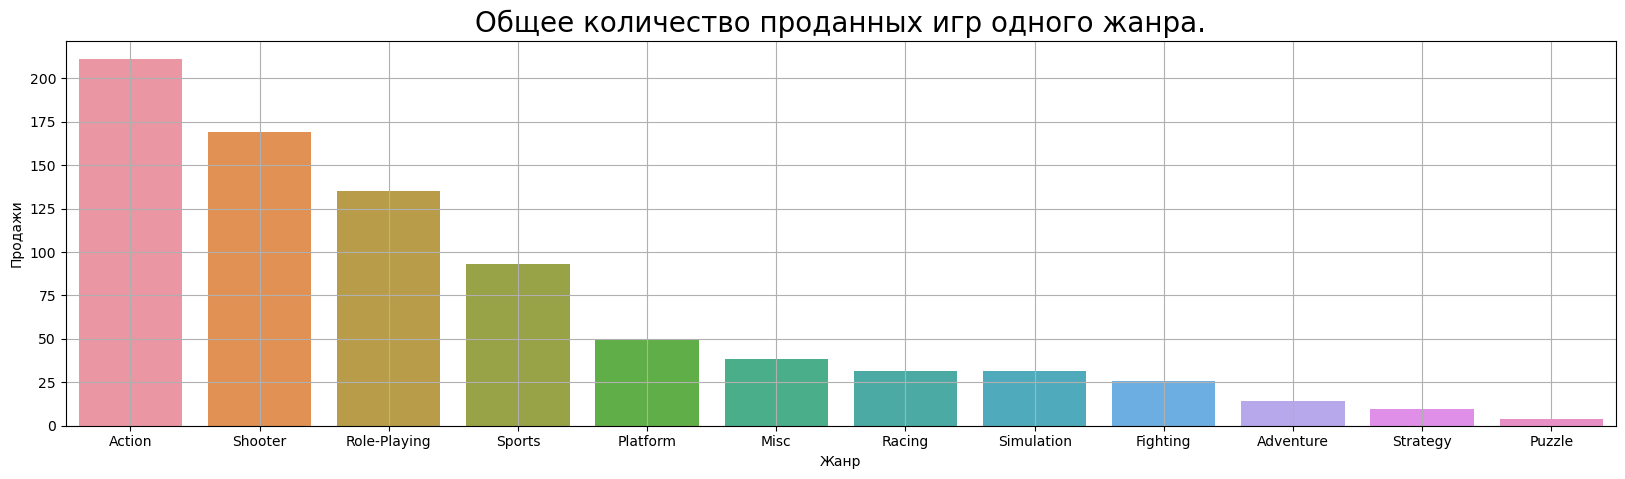

In [69]:
all_genre_sum = df_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Общее количество проданных игр одного жанра.', fontsize=20)
sns.barplot(x=all_genre_sum['genre'], y=all_genre_sum['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);
all_genre_sum

**Рассматривая по медиане.**
* Самый популярный жанр - Shoote", у него больше всего продаж, а меньше всего у Adventure	.

* Наибольшую популярность имеют жанры: Shooter, Sports, Platform, Role-Playing. У них наибольшее количество продаж с отрывом от остальных.

**Рассматривая по сумме.**
* Самый популярный жанр - Action, у него больше всего продаж, а меньше всего у Puzzle.

* Наибольшую популярность имеют жанры: Action, Shooter, Role-Playing	, Sports. У них наибольшее количество продаж с отрывом от остальных.

Рассмотрим по всем платформам за последние 5 лет.

,genre,total_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


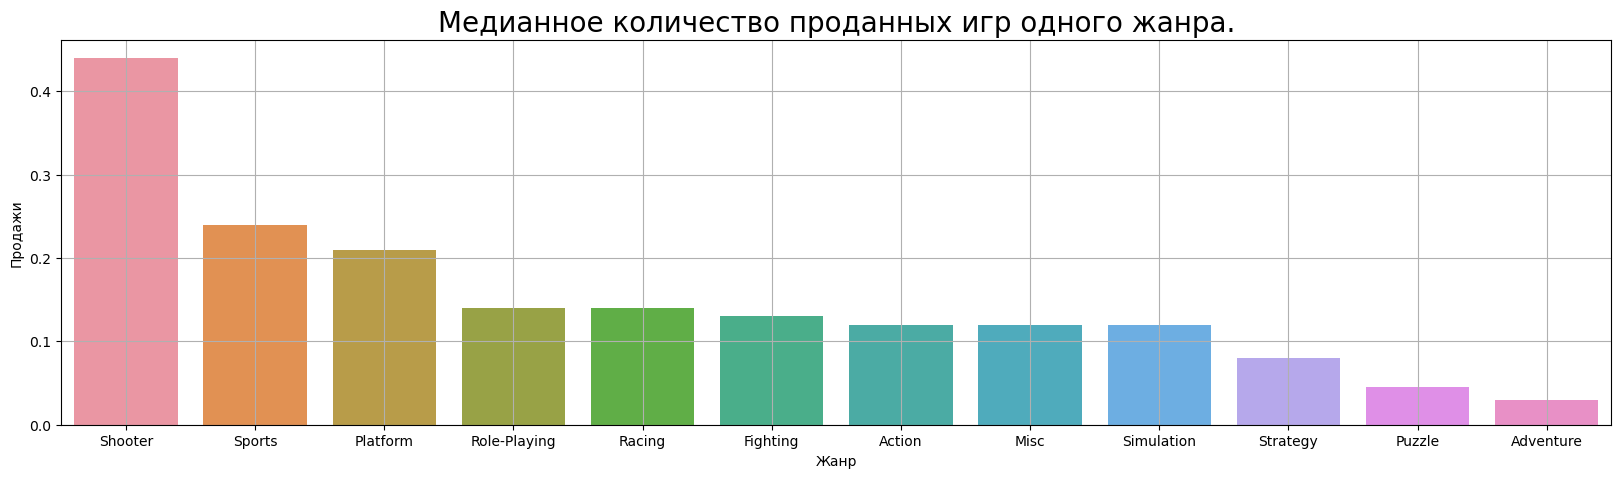

In [70]:
all_genre_median_five = df_forecast.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Медианное количество проданных игр одного жанра.', fontsize=20)
sns.barplot(x=all_genre_median_five['genre'], y=all_genre_median_five['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);
all_genre_median_five

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.06
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


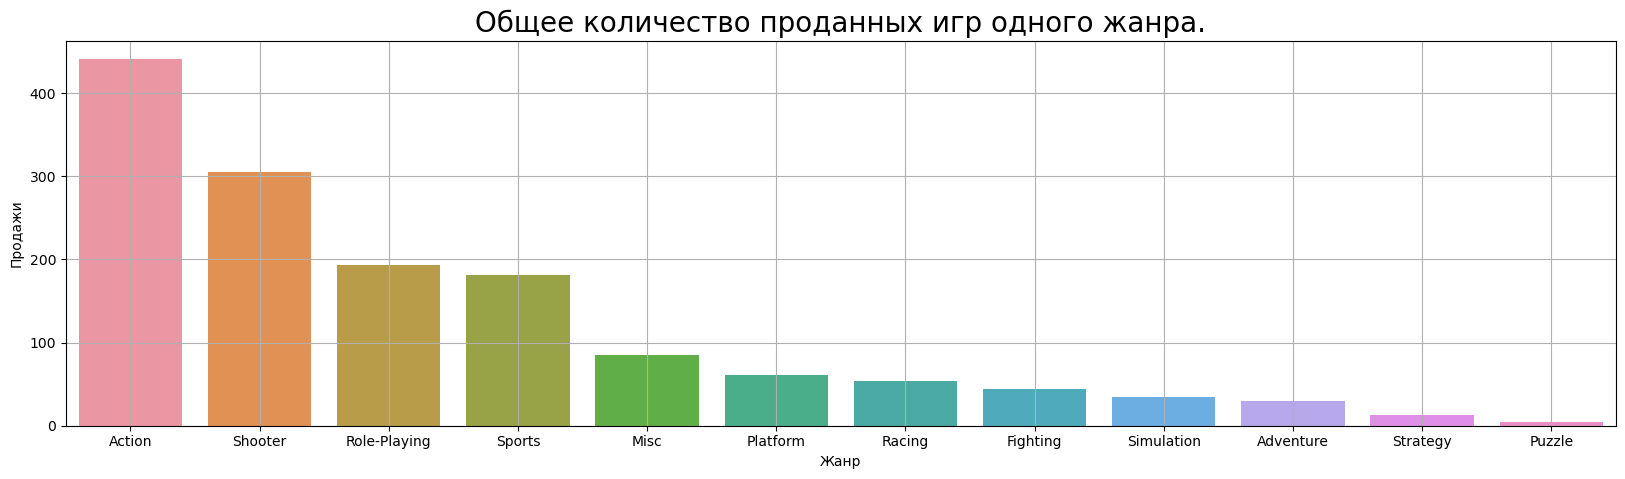

In [71]:
all_genre_sum_five = df_forecast.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Общее количество проданных игр одного жанра.', fontsize=20)
sns.barplot(x=all_genre_sum_five['genre'], y=all_genre_sum_five['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);
all_genre_sum_five

**Рассматривая по медиане.**
* Самый популярный жанр - Shoote", у него больше всего продаж, а меньше всего у Adventure	.

* Наибольшую популярность имеют жанры: Shooter, Sports, Platform, Role-Playing. У них наибольшее количество продаж с отрывом от остальных.

**Рассматривая по сумме.**
* Самый популярный жанр - Action, у него больше всего продаж, а меньше всего у Puzzle.

* Наибольшую популярность имеют жанры: Action, Shooter, Role-Playing	, Sports. У них наибольшее количество продаж с отрывом от остальных.

**Рассматривая продажи топ 5 платформ и за последние 5 лет видно, что тенденция полностью сохраняется. Единственное, жанр игр Action по сумме стал намного ярче выделяться, что в очередной раз доказывает его популярность.**

**Вывод:**
* Средний срок жизни консоли составляет 11 лет.
* Потенциально прибыльными платформами на период с 2017 года считаю: 3DS, XONE, PS4, WIIU. Они появились недавно, и имеют положительную динамику роста количества проданных игр. PC на все времена отставался стабильной платформой. Отдельно можно выделить XONE, PS4. Оценивая продажи игр на их предшественниках X360 и PS3 могу сказать, что это будут два главных конкурента.
* Мнения критиков влияет на количество продаж, хоть и не сильно. Мнение игроков никак особо не влияет, учитывая тот факт, что ему нужно сначала купить игру, а уже потом дать оценку)))
* Жанр имеет значените. Игроки больше ценят:  Action, Shooter, Role-Playing , Sports, Platform.

# Составим портрет пользователя каждого региона.

**Северная америка**

Топ-5 платформ.

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


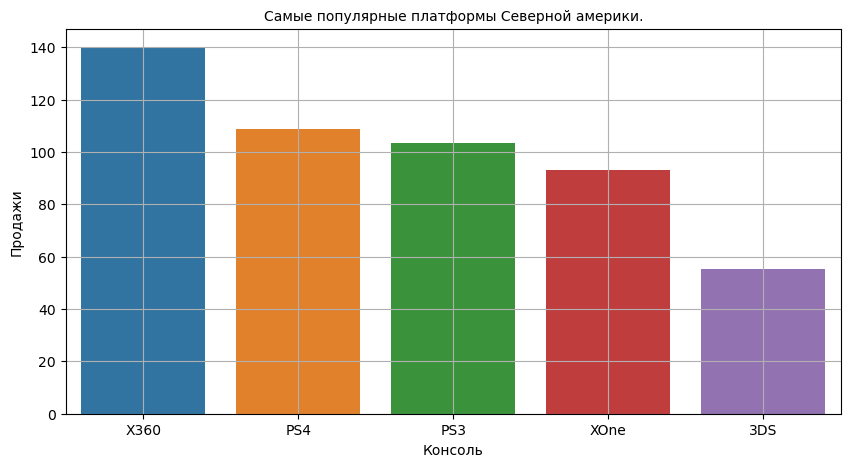

In [72]:
na_platform = (df_forecast
 .groupby('platform')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные платформы Северной америки.', fontsize=10)
sns.barplot(x=na_platform['platform'], y=na_platform['na_sales'])
plt.ylabel('Продажи')
plt.xlabel('Консоль')
plt.grid(True);

na_platform

Топ жанры.

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


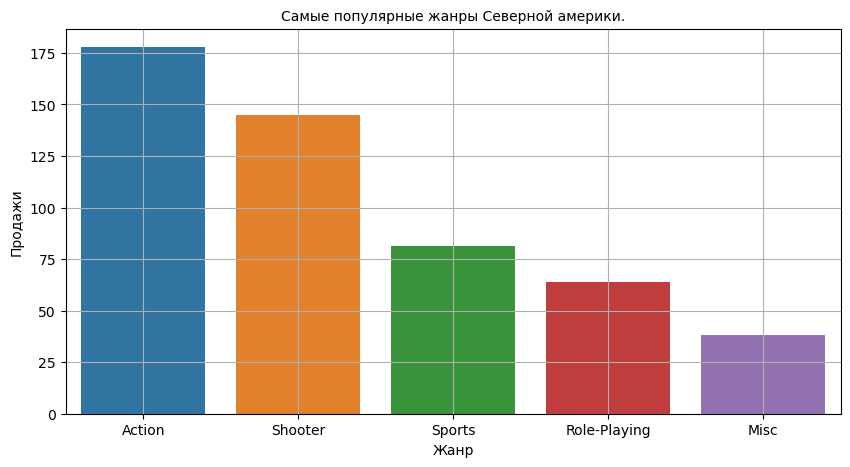

In [73]:
na_genre = (df_forecast
 .groupby('genre')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные жанры Северной америки.', fontsize=10)
sns.barplot(x=na_genre['genre'], y=na_genre['na_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);
na_genre


Топ рейтинг игр.

,rating,na_sales
2,M,231.57
0,E,114.37
3,NR,103.31
1,E10+,75.70
4,T,66.02


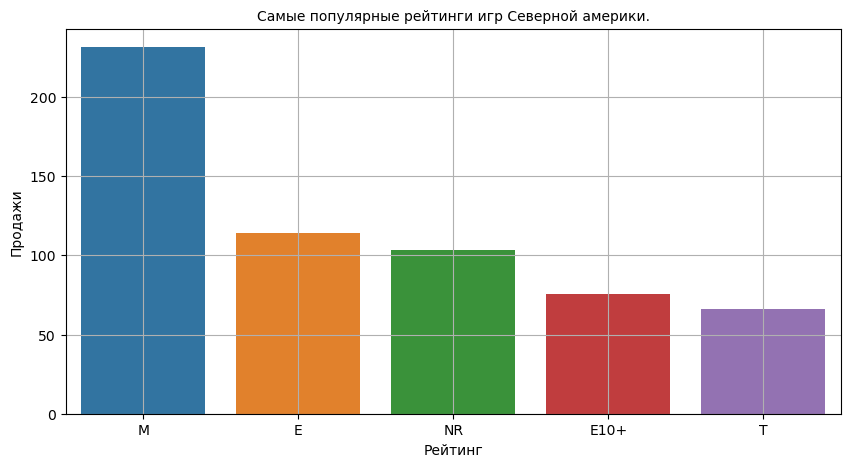

In [74]:
na_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные рейтинги игр Северной америки.', fontsize=10)
sns.barplot(x=na_rating['rating'], y=na_rating['na_sales'])
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.grid(True);

na_rating


* Самые популярные платформы в Северной америке X360, PS4, PS3.
* Самые популярные жанры Action, Shooter, Sports, Role-Playing, Misc.
* С большим отрывом по продажам лидирует рейтинг М, затем идут Е и RT.

**Европа.**

Топ-5 платформ.

,platform,eu_sales
4,PS4,141.09
3,PS3,106.85
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


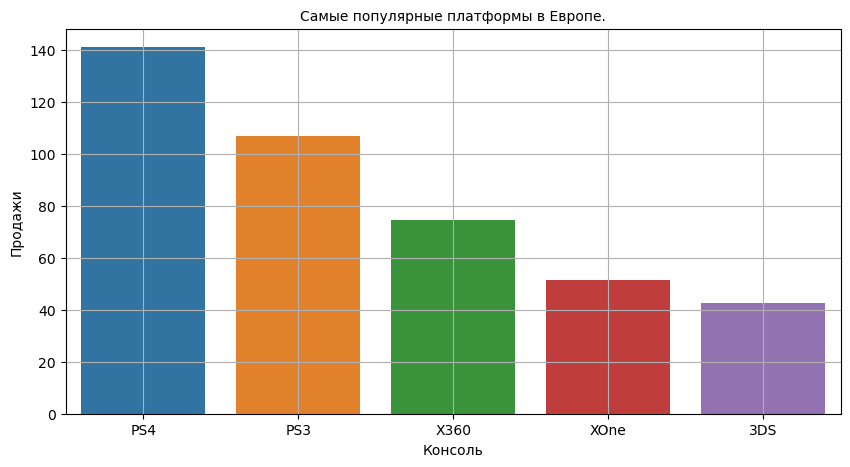

In [75]:
eu_platform = (df_forecast
 .groupby('platform')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные платформы в Европе.', fontsize=10)
sns.barplot(x=eu_platform['platform'], y=eu_platform['eu_sales'])
plt.ylabel('Продажи')
plt.xlabel('Консоль')
plt.grid(True);

eu_platform

Топ-5 жанров.

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.08
7,Role-Playing,48.53
6,Racing,27.29


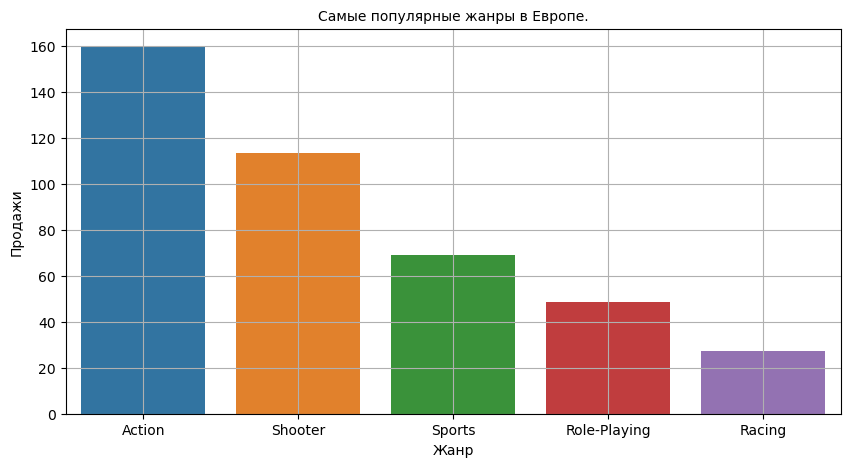

In [76]:
eu_genre = (df_forecast
 .groupby('genre')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные жанры в Европе.', fontsize=10)
sns.barplot(x=eu_genre['genre'], y=eu_genre['eu_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);

eu_genre

Топ рейтинг.

,rating,eu_sales
2,M,193.96
0,E,113.02
3,NR,91.50
1,E10+,55.37
4,T,52.96


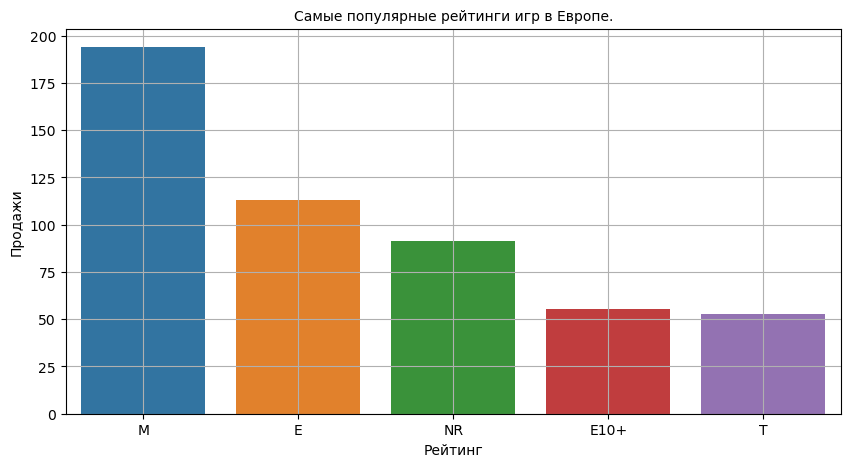

In [77]:
eu_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные рейтинги игр в Европе.', fontsize=10)
sns.barplot(x=eu_rating['rating'], y=eu_rating['eu_sales'])
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.grid(True);

eu_rating

* Самые популярные платформы в Европе PS4, PS3, X360
* Самые популярные жанры Action, Shooter, Sports, Role-Playing, Racing
* По продажам лидирует рейтинг М, затем идут Е и NR.

**Ярония.**

Топ-5 платформ.

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


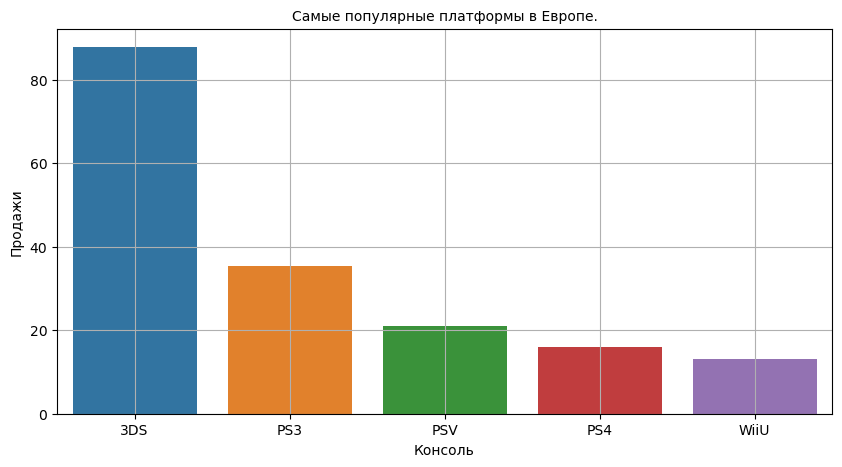

In [78]:
jp_platform = (df_forecast
 .groupby('platform')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные платформы в Европе.', fontsize=10)
sns.barplot(x=jp_platform['platform'], y=jp_platform['jp_sales'])
plt.ylabel('Продажи')
plt.xlabel('Консоль')
plt.grid(True);

jp_platform

Топ-5 жанров.

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


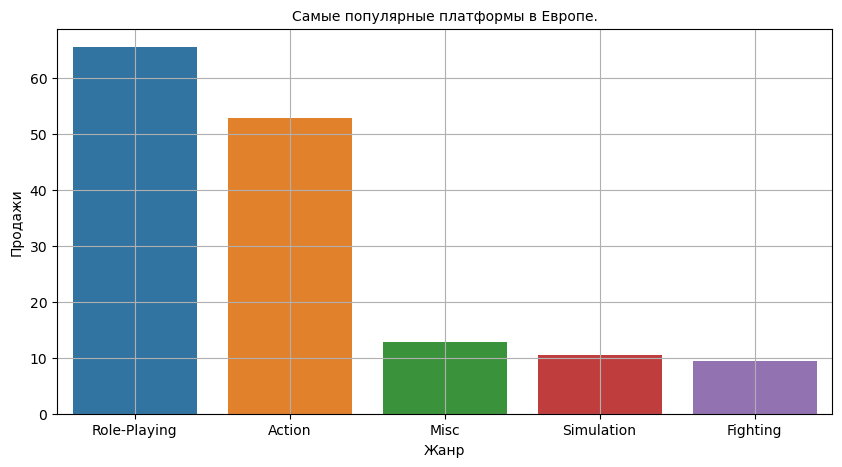

In [79]:
jp_genre = (df_forecast
 .groupby('genre')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные платформы в Европе.', fontsize=10)
sns.barplot(x=jp_genre['genre'], y=jp_genre['jp_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);

jp_genre

Топ рейтинг.

,rating,jp_sales
3,NR,108.84
0,E,28.33
4,T,26.02
2,M,21.20
1,E10+,8.19


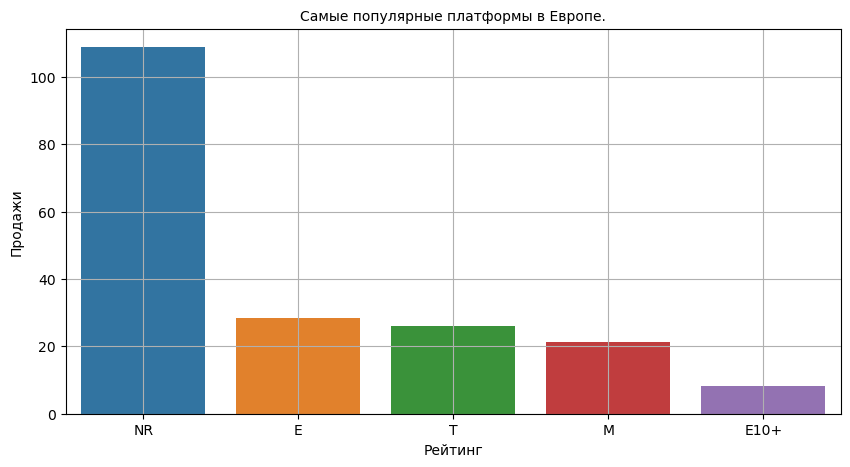

In [80]:
jp_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные платформы в Европе.', fontsize=10)
sns.barplot(x=jp_rating['rating'], y=jp_rating['jp_sales'])
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.grid(True);

jp_rating

* Самые популярные платформы в Японии 3DS, PS3, PSV.
* Самые популярные жанры Role-Playing Action Misc Simulation Fighting.
* По продажам лидирует рейтинг NR, затем идут Е и T.

**Другие страны.**

Топ-5 платформ.

,platform,other_sales
4,PS4,48.35
3,PS3,43.26
9,X360,20.40
10,XOne,14.27
0,3DS,8.87


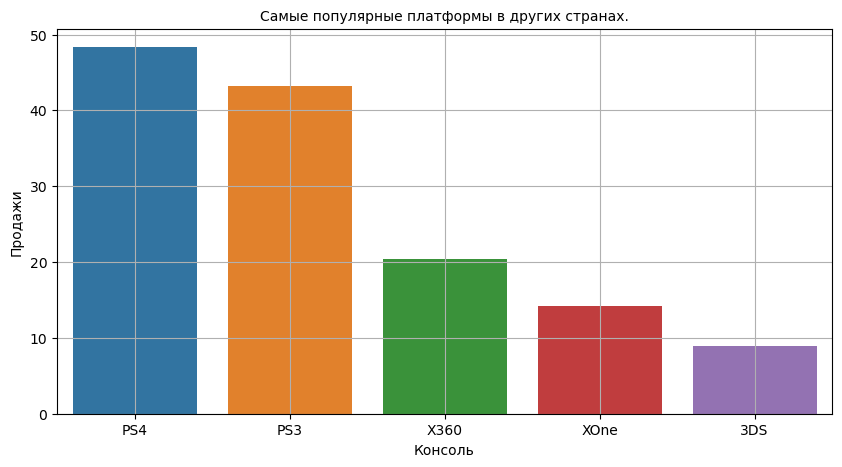

In [81]:
other_platform = (df_forecast
 .groupby('platform')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные платформы в других странах.', fontsize=10)
sns.barplot(x=other_platform['platform'], y=other_platform['other_sales'])
plt.ylabel('Продажи')
plt.xlabel('Консоль')
plt.grid(True);

other_platform

Топ-5 жанров.

,genre,other_sales
0,Action,51.14
8,Shooter,37.26
10,Sports,22.44
7,Role-Playing,14.83
3,Misc,7.67


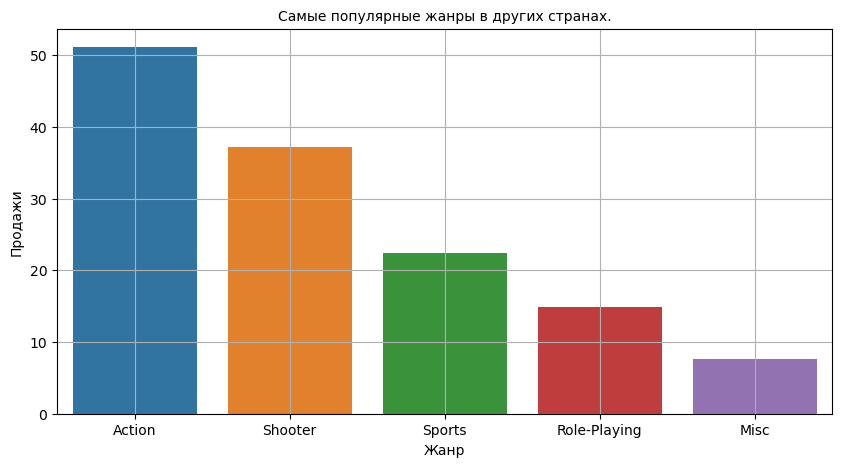

In [82]:
other_genre = (df_forecast
 .groupby('genre')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные жанры в других странах.', fontsize=10)
sns.barplot(x=other_genre['genre'], y=other_genre['other_sales'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.grid(True);

other_genre

Топ рейтинг.

,rating,other_sales
2,M,63.38
0,E,31.44
3,NR,27.17
4,T,17.94
1,E10+,16.23


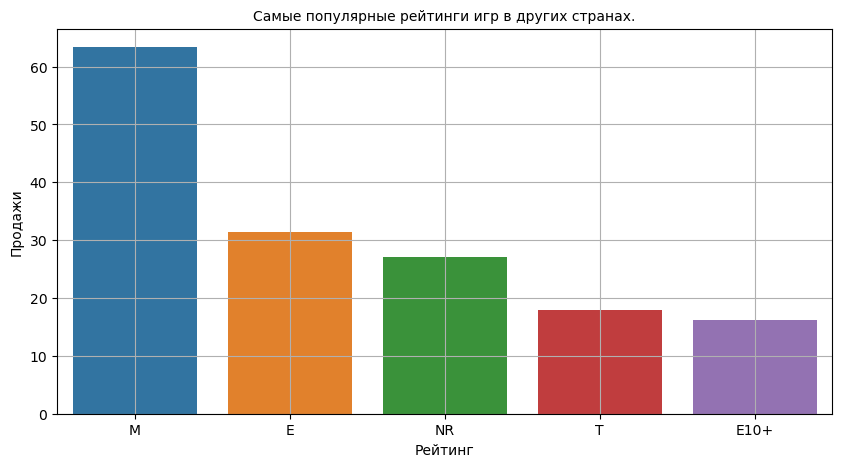

In [83]:
other_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('Самые популярные рейтинги игр в других странах.', fontsize=10)
sns.barplot(x=other_rating['rating'], y=other_rating['other_sales'])
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.grid(True);

other_rating

* Самые популярные платформы в оставшихся странах PS4, PS3, X360.
* Самые популярные жанры Action, Shooter, Sports, Role-Playing,Misc/
* По продажам лидирует рейтинг М, затем идут Е и NR.

**Вывод:**

**Северная Америка.**
* Только в Северной Америке самая популярная консоль X360. Что логично, т.к. компания Microsoft, является американской и Северная америка по сути является местным рынком сбыта.
* Самые популярные жанры Action, Shooter, Sports. Единственный рынок где в Топ 5 жанров входит Misc.
* Самый популярный рейтинг М.

**Европа**
* В Европе уже PS4 полностью захватил рынок опережая своего главного конкурента XOne почти в 3 раза.
* Самые популярные жанры Action, Shooter, Sports. Так же очень популярен жанр гонок (Racing).
* По продажам лидируют игры рейтинга М, как и в Северной Америке.

**Япония**
* Страна у которой все по другому.
* Самые популярная консоль 3DS. Так же в 3 входит и PSV.
* Самые популярные жанры Role-Playing, Action, Misc, Simulation. Вместо Европейских гонок предпочитают жанр драки (Fighting).
* Предпочитают игры с рейтингом NR.

**Другие страны.**
* Все очень похоже по популярности, как в Европейских странах.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним в датасете нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Это необходимо учитывать при предобработке данных.</font>

# Проверим гипотезы.

Для проверки гипотиз, мы будем использовать.
Гипотезу о равенстве средних двух генеральных совокупностей.
Основные аспекты, которые надо проверить, чтобы понять, можно ли применять t-тест:
* Генеральные совокупности не должны зависеть друг от друга.
* Выборочные средние должны быть нормально распределены.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

* H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны
* H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [84]:
alpha = .05

In [85]:
x_one = df_forecast.query('platform == "XOne" and user_score != -1')
pc = df_forecast.query('platform == "PC" and user_score != -1')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не отфильтрованы заглушки.</font>


<font color='Blue'> Исправлено.

In [86]:
# Комментарий ревьюера
x_one.user_score.min(), pc.user_score.min()

(1.6, 1.4)

(<AxesSubplot:>, <AxesSubplot:>)

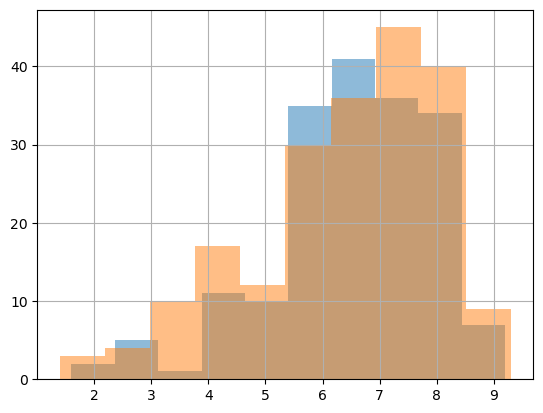

In [87]:
x_one['user_score'].hist(alpha = .5), pc['user_score'].hist(alpha = .5)

In [88]:
results = st.ttest_ind(x_one['user_score'],pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
print('Cредний пользовательский рейтинг консоли Xbox One -', round(x_one['user_score'].mean(),2))
print('Cредний пользовательский рейтинг консоли PC -', round(pc['user_score'].mean(),2))

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг консоли Xbox One - 6.52
Cредний пользовательский рейтинг консоли PC - 6.43


**Вывод.**
* Пользовательские рейтинги консолей Xbox One и PC равны.

*  После принятия критический уровеня вероятности в 5%, гипотезу следует не отвергать. Значение p-value достаточно большое. Оценки пользователей на этих платформах не отличаются.

Ведь пользаватели оценивают саму игру(сюжет, графика, качество игры), а не платформу на которой играют. Единственное на что может повлиять на оценку консоль это на сколько оптимизированна под нее игра. Ведь по умолчанию на PC мышь и клавиатуры, а на Xbox One джостик.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

* H₀ - средние пользовательские рейтинги жанров Action и Sports равны
* H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [89]:
alpha = .05

In [90]:
action = df_forecast.query('genre == "Action" and user_score != -1')
sports = df_forecast.query('genre == "Sports" and user_score != -1')


In [91]:
action['user_score'].min(), sports['user_score'].min()

(1.6, 0.2)

(<AxesSubplot:>, <AxesSubplot:>)

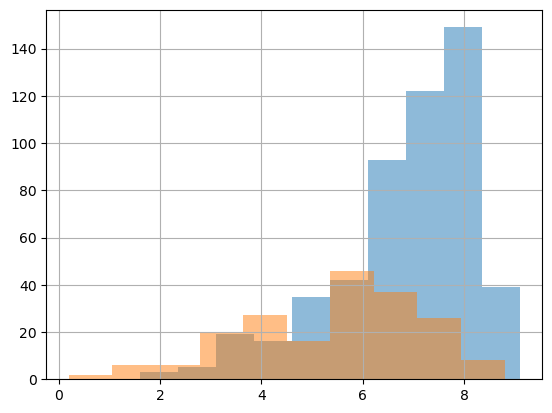

In [92]:
action['user_score'].hist(alpha = .5), sports['user_score'].hist(alpha = .5)

In [93]:
results = st.ttest_ind(action['user_score'],sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
print('Cредний пользовательский рейтинг жанра Action -', round(action['user_score'].mean(),2))
print('Cредний пользовательский рейтинг жанра Sports -', round(sports['user_score'].mean(),2))

p-значение: 4.804523380462917e-26
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.83
Cредний пользовательский рейтинг жанра Sports - 5.46


**Вывод**
* Пользовательские рейтинги жанров Action и Sports не равны.

* После принятия критический уровеня вероятности в 5%, гипотезу следует отвергнуть как маловероятную. Оценки очень сильно отличаются между жанрами Action и Sports.

# Общий Вывод:

**Во время предобработки данных.**
* привели названия столбцов к нижнему регистру
* преобразовали столбцы в нужные типы данных
* обработали пропуски
* user_score изменили значения tbd на -1;
* посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales
**Провели исследовательский анализ данных**
* выделили срез данных за 2012-2016 гг
* узнали, что, средний срок жизни консоли составляет 11 лет
* опредили топ 5 платформ,Топ 5 платформ будут: 3DS, XONE, PS4, WIIU, PC
* увидели что многие консоли идут на спад, на смену PS3 и X360, приходят PS4 и XOne.
* мнения критиков влияет на количество продаж, но не сильно.
* самые популярные жанры: Action, Shooter, Role-Playing , Sports, Platform.
**Составим портрет пользователя каждого региона**
**Северная Америка**
* Самые популярные платформа X360.
* Самые популярные жанры Action, Shooter, Sports.
* Самые популярный рейтинг М.
**Европа и другие страны**
* Самые популярные платформа PS4
* Самые популярные жанры Action, Shooter, Sports.
* По продажам лидирует рейтинг М.
**Япония**
* Самые популярные платформы в Японии 3DS.
* Самые популярные жанры Role-Playing, Action, Misc.
* По продажам лидирует рейтинг NR.
**Проверили две гипотезы**
* Пользовательские рейтинги консолей Xbox One и PC равны.
* Пользовательские рейтинги жанров Action и Sports не равны.

**При планировании рекламной компании на 2017 г. следует обратить внимание.**
* **На продвижение платформы, в особенности XONE, PS4, которые пришли на смену своих предшественников. Не стоит так же забывать про PC который всегда показывает стабильный результат.**
* **На популярность жанра в кажом регионе для максимального охвата. Особенно на жанр Action, являющимся в совокупности абсолютным лидером по популярности.**
* **Рейтинг игр, для более максимального охвата**
* **Мнение критиков, чье решение может повлиять на популярность и продаваемость игры.**
* **Будущие консоли, которые очень быстро занимают позиции своих предшественников.**

**Особое внимание нужно уделять менталитету страны. Где предпочтения одних, могут кардинально отличаться от всего Мира. Одним из ярких примеров является Япония**